まず最初に必要なものをインポートします。

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

まずkaggleからタイタニック号沈没事件のデータを落としてpandasで読み込みます。

In [2]:
titanic_td = pd.read_csv('train.csv')
titanic_td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


このデータの項目は以下のとおりです。
- PassengerID:   乗客ID
- Survived:      生存結果 (1: 生存, 0: 死亡)
- Pclass:        (PassengerClass)客室の等数。1等客室、2等客室、3等客室の3つで1等客室が最も高級。
- Name:          乗客の名前
- Sex:           性別
- Age:           年齢
- SibSp:         (Sibling,Species) 兄弟姉妹。(1:兄弟姉妹と一緒に乗った,0:いなかった)
- Parch:         (Parent,Children) 両親もしくは子供の数。(1:親もしくは子といた。0:いなかった。)
- Ticket:        チケット番号
- Fare:          乗船料金
- Cabin:         当時いた船の中の場所
- Embarked:      乗船した港Cherbourg、Queenstown、Southamptonの３種類

kaggleで配布されているタイタニック号のデータは
- 約900人分のラベル付きの学習データ
- 約400人分のラベルなしの学習データ

という構成になっていて、本来的には900人分学習して、400人の生存率を求める。という用途で利用するもののようですが、今回は学習は行わずデータ分析のみに徹したいと思います。

### 問題設定をする
データ分析をしていく上で何が知りたいのか考えてみます。
- 男女比率は？
- 年齢分布は？
- 大人と子供の比率は？
- 性別や年令の生存比率は？
- 客室と生存率の相関はあるか？
- Cabinと生存率の相関はあるか？


### 与えられたデータを詳しく見ていく

#### 性別
男女比です。

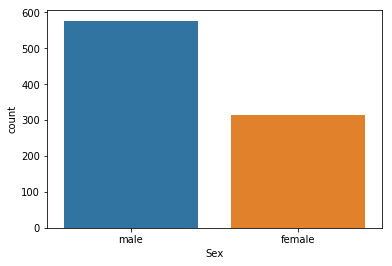

In [3]:
sns.countplot('Sex', data=titanic_td)

男性は女性の2倍ほど乗っていたようです。

#### 客室を性別で層別化してみる

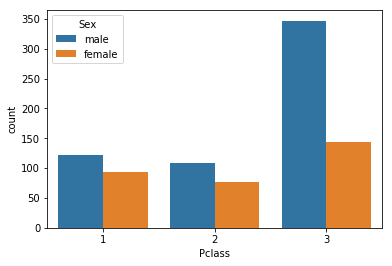

In [4]:
sns.countplot('Pclass', hue='Sex', data=titanic_td)

2等客室が最も人数が少なく、3等客室が最も人数が多く、どの客室でも男性の方が多いことがわかります。


次に年齢から、大人と子供に分け、性別に加え、「子供」というカテゴリーを作成します。
pandasのイテレーションについては以下のサイトが参考になりました。

【参考】[Python pandas データのイテレーションと関数適用、pipe - StatsFragments](http://sinhrks.hatenablog.com/entry/2015/06/18/221747)

In [5]:
# 16歳未満を子供とする
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [6]:
# personという名前の新しい列を追加します
# titanic_td[['Age','Sex']]
titanic_td['person'] = titanic_td[['Age','Sex']].apply(male_female_child, axis=1)
titanic_td['person'].head(10)

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7     child
8    female
9     child
Name: person, dtype: object

ここで、再び先程と同じことをしてみます。

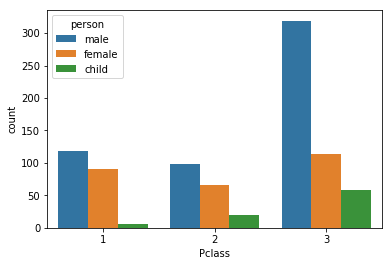

In [7]:
sns.countplot('Pclass', data=titanic_td, hue='person')

上の結果より、１等客室にはあまり子供がおらず、３等客室に子供が多いことがわかります。

### 年齢
年齢の分布をヒストグラムで見てみます。

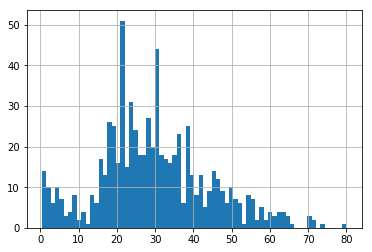

In [8]:
titanic_td['Age'].hist(bins=70)

すごく高齢の人もいるし、0歳の子がたくさんいることもわかります。

### 客室と年齢の相関
客室と年齢の分布を見てみます。

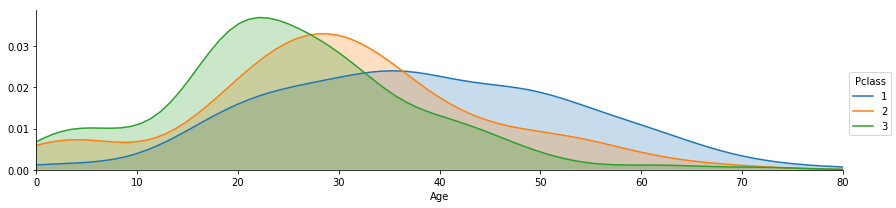

In [9]:
fig = sns.FacetGrid(titanic_td, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_td['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

客室のレベルが下がるにつれて年齢も下がっているのがわかります。
やっぱ高齢の人はお金あるんですね。
> タイタニック号の一等客室は、現在（2015年）の通貨で約77,000ポンドでした。平均的な二等客室は約1,000ポンド、三等客室は約300ポンドから600ポンドで、その差はとても大きいものでした。

【出典】[映画『タイタニック』の驚くべき14の事実 | ciatr[シアター]](https://ciatr.jp/topics/74473)


### 家族連れか？単身者か？

In [10]:
titanic_td['Alone'] = titanic_td.Parch + titanic_td.SibSp
titanic_td['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

/Users/cloudspider/.pyenv/versions/350tensorflow/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


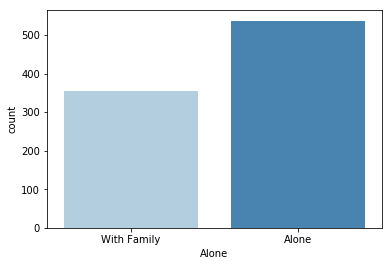

In [11]:
titanic_td['Alone'].loc[titanic_td['Alone'] >0] = 'With Family'
titanic_td['Alone'].loc[titanic_td['Alone'] == 0] = 'Alone'
sns.countplot('Alone', data=titanic_td, palette='Blues')

単身者の方が若干多いようです。

### どのような人が生存したか
ここまでは乗客がどのような人かを見てきましたが、これからは生存率とその他の項目との相関を調べていきます。

まずは全体の生存率を見てみます。

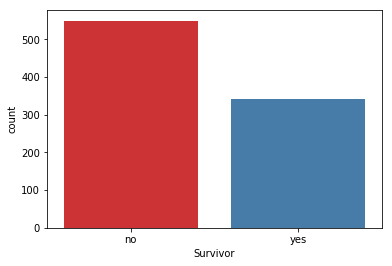

In [12]:
titanic_td["Survivor"] = titanic_td.Survived.map({0: "no", 1:"yes"})
sns.countplot('Survivor', data=titanic_td, palette='Set1')

次に生存者と客室の相関を見てみます。

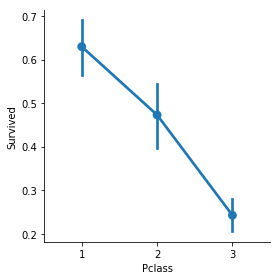

In [13]:
sns.factorplot('Pclass', 'Survived', data=titanic_td, order=[1,2,3])

３等客室は生存率が著しく低いのが見て取れます。
１等客室の人たちの救助を優先したのでしょう。

以下のような、意図的な理由や人員不足の理由もあったようです。

> タイタニック号のクルーは三等船客の避難を積極的に妨害した。錠がかけられクルーにより見張られた壁もあり、これは明らかに三等船客が救命ボートに殺到するのを防ぐためであった。

【引用】[タイタニック号沈没事故 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

> この時点で、救命ボートに乗った乗客のほとんどは一等船室及び二等船室の乗客であった。船尾の三等船室にいた乗客はほとんどデッキにたどり着けず、通路でうろうろと迷い、三等船室を一等や二等の区域と分けている壁や仕切りに阻まれて動けなかった。この隔離は単なる社会的理由だけではなく、アメリカ合衆国移民法の条件によるものでもあった。この法は、移民をコントロールし、感染症の広がりを防ぐため三等船客を隔離するよう定めていた。

【引用】[タイタニック号沈没事故 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

> 一等船室の客室係は数室のみを担当していたが、一方で二等と三等担当の客室係は多数の人々をさばかねばならなかった。一等船室の客室係は直接的な支援を行い、担当している人々が服を着るのを手伝い、デッキまで連れて行くこともしていた。ずっと多くの人々に対処せねばならなかった二等と三等の客室係のほとんどはドアを開け放ち、安全ベルトをつけて上に来るよう乗客に伝えるところまでしかできなかった。三等船室では、乗客はおおむねデッキに来るよう言われた後は自分の判断で行動するほかなかった。

【引用】[タイタニック号沈没事故 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

次に性別の生存率を見てみます。

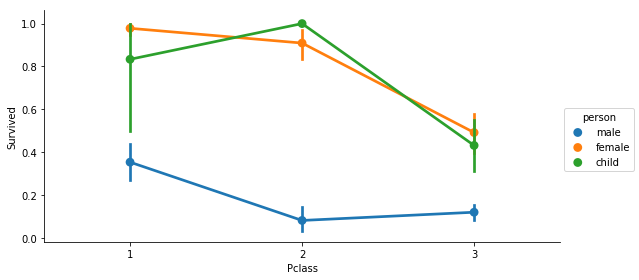

In [14]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_td, order=[1,2,3], aspect=2)

客室にかかわらず、女性と子供の生存率が高く、男性の生存率が低いことが見て取れます。
これはwikiの
>ライトラーが船長に「女性と子供をボートに乗せた方が良いのではないでしょうか。」 （"Hadn't we better get the women and children into the boats, sir?"） と提案したところ、船長は「女性と子供を乗せて降下させよう。」 （"women and children in and lower away."） と答えた。

【引用】[タイタニック号沈没事故 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

という記述からもわかるように、救助に当たっては女性と子供が優先されたようですね。
また、以下の様な記述もありました。

> どちらの船員もボートを降ろす時に1隻あたりの安全積載人数を知らず、気をつけすぎていっぱいまで乗せないという過ちを犯した。もし積載人数いっぱいまで乗せていたら、もう500名ほどの人々の命が救えたであろうと考えられている。これが行われなかったため、救命ボートは多くの空席があるまま進水し、数百名の人々（大部分が男性）が船に取り残された。


【引用】[タイタニック号沈没事故 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

次に年齢と生存率の関係です。

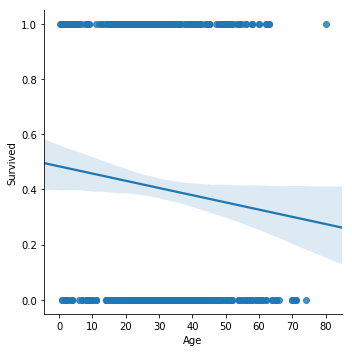

In [15]:
sns.lmplot('Age', 'Survived', data=titanic_td)

高齢になるほど生存率が下がっています。
ちなみにグラフの薄い水色の範囲は95%の信頼区間を示しています。

次に客室と年齢と生存率の関係を見てみます。

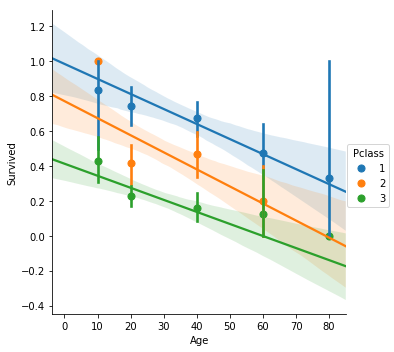

In [16]:
generations=[10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_td, x_bins=generations, hue_order=[1,2,3])

1等客室の生存率は高いのがわかります。
また、高齢な人は生存率は低いが、飛び抜けて標準偏差が高いので一部の高齢者(偉い人？）の生存率がすごく高いのがわかります。
真っ先に助けられたのでしょうか。

次に、性別で層別化してみます。
女性は高齢の方が生存率が高く、男の高齢の偉い人は生存率が高いのがわかります。

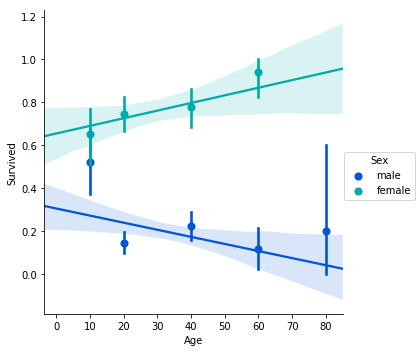

In [17]:
sns.lmplot('Age', 'Survived', hue='Sex', data=titanic_td, palette='winter', x_bins=generations)

### 乗客がいたデッキと生存率は関係あるか？
「生存率」と「Cabin」と「客室」のデータフレームを作成します。

In [18]:
deck_sv = titanic_td[['Survived','Cabin','Pclass']]
deck_sv = deck_sv.dropna()

pclass = []
for pcl in deck_sv['Pclass']:
    pclass.append(pcl)

surs = []
for sur in deck_sv['Survived']:
    surs.append(sur)

# Cabinは最初の一文字で場所がわかる
levels = []
for level in deck_sv['Cabin']:
    levels.append(level[0])

pcl_df = DataFrame({'Pclass': pclass})
surs_df =  DataFrame({'Survivor':surs})
cabin_df = DataFrame({'Cabin': levels})

deck_sv = pd.concat([surs_df, cabin_df, pcl_df], axis=1)
deck_sv

,Survivor,Cabin,Pclass
0,1,C,1
1,1,C,1
2,0,E,1
3,1,G,3
4,1,C,1
5,1,D,2
6,1,A,1
7,0,C,1
8,1,B,1
9,1,D,1


可視化してみます。

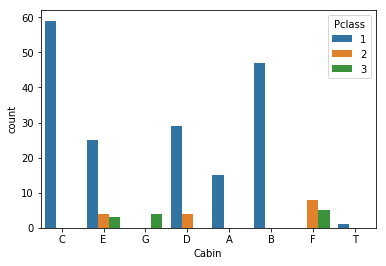

In [19]:
sns.countplot('Cabin', hue='Pclass', data=deck_sv)

'T'というないはずのデータがあります。データ入力の時にミスったのでしょう。外します。

【参考】[pandasで条件にあった値を持つ行を削除する場合 - アクサンの場合](http://accent.hatenablog.jp/entry/2016/11/23/165005)

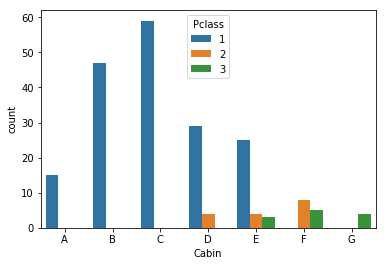

In [20]:
deck_sv = deck_sv[deck_sv.Cabin != 'T']
sns.countplot('Cabin', hue='Pclass', data=deck_sv, order=['A','B','C','D','E','F','G'])

あれ?
さっきまで３等客室の人数が一番多かったのに、この図では１等客室が一番多くなっています。何ででしょう。

これは、さきほどのdropna()によって、Cabinが'NaN'になっている人を削除した時に、２等客室、３等客室の人が多く削除された様です。
つまり、「場所がどこか」を記述させる手続きは全体的にはやったりやらなかったりが多いが、１等客室の人に対してはちゃんと行ったということになるのでしょうか。

次にCabinと生存率の関係を見てみます。

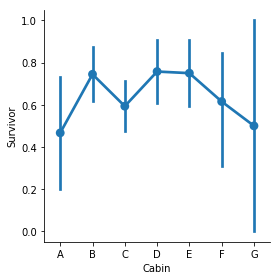

In [21]:
sns.factorplot('Cabin','Survivor', data=deck_sv, order=['A','B','C','D','E','F','G'])

前述した通り、この図では１等客室の人が多く全体的に生存率が高くなっていますが、
それでもAが低く、B,D,Eが高くなっているのがわかります。
wikiにこんな記述がありました。

> CからGまでのデッキにある三等船室はデッキの終端部分であったため、乾舷までたどり着くには長く曲がりくねった通路を通る必要があり、救命ボートまで最も遠かった。対照的に一等船室は上甲板にあり、最短であった。このため、救命ボートまでの近さは誰が乗れたかを決める重要要因となった。

【引用】[タイタニック号沈没事故 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

![](http://marumaru.tonkotsu.jp/wp-content/uploads/2017/12/1400px-Titanic_side_plan_annotated_English-1024x323.png)
【引用】[https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85](https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85)

> 


こうあるように、場所によって助けやすさのようなものがあったのでしょう。

# childの年齢別の生存率を知りたい。

wikiを読むだけでも、タイタニック号から救助ボートに移る過程、
また救助ボートに移った上で、救助隊のカルパチア号が来るまでの間に数時間がかかったことや、
水温が物凄く低かったことなどから、大変過酷な状況であったことが見て取れるが、
やはり子供の中でも０歳に近くなる方が生存率が下がってしまうのだろうか。

In [22]:
titanic_td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes


In [23]:
child_td = titanic_td[titanic_td['person'] == 'child']
child_td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,child,With Family,no
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,child,With Family,yes
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,child,With Family,yes
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,child,Alone,no
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,child,With Family,no
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,NaN,Q,child,Alone,yes
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,child,With Family,no
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,NaN,C,child,With Family,yes
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,child,With Family,yes
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,child,With Family,no


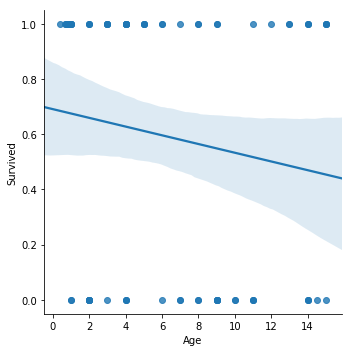

In [24]:
sns.lmplot('Age', 'Survived', data=child_td)

素晴らしい。
総合的に子供の生存率は高めだが、その中でも０歳に近い子供の生存率が高くなっている。
周りの大人の人が必死に守ってあげたのだろう。